In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
import plotly.graph_objects as go
import pandas as pd
from arrakis_nd import *
import seaborn as sn
import h5flow


In [2]:
# load test file
arr = np.load('/global/cfs/cdirs/dune/users/mnuland/arrakis_test/MiniRun4_1E19_RHC.flow.00000.FLOW.arrakis_nd.npz', allow_pickle=True)

In [19]:
# select event
event = 102

In [20]:
# get event info
x = arr['det_features'][event][:,0]
y = arr['det_features'][event][:,1]
z = arr['det_features'][event][:,2]
Q = arr['det_features'][event][:,3]

In [21]:
# get event info
t_drift = arr['mc_features'][event][:, 0]
ts_pps = arr['mc_features'][event][:, 1]
E = arr['mc_features'][event][:, 2]
n_photons = arr['mc_features'][event][:, 3]
total_photons_per_event = [np.sum(event) for event in n_photons]

In [22]:
# get event info
particle_label = arr['classes'][event][:, 0]
topology_label = arr['classes'][event][:, 1]
micro_label = arr['classes'][event][:, 2]
meso_label = arr['classes'][event][:, 3]
macro_label = arr['classes'][event][:, 4]

In [23]:
# plot event
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=total_photons_per_event,                # set color to an array/list of desired values
        colorscale='Jet',       # choose a colorscale
        opacity=0.8,
        colorbar=dict(title='Number of photons'),
        cmin=0,                  # minimum color value
        cmax=np.max(total_photons_per_event),
    ),
    text = np.stack((particle_label, topology_label, micro_label, meso_label, macro_label), axis=-1),
    hovertemplate='Particle label: %{text[0]}<br>Topology label: %{text[1]}<br>Micro label: %{text[2]}<br>Meso label: %{text[3]}<br>Macro label: %{text[4]}<extra></extra>',)])

fig.show()

In [50]:
df = pd.DataFrame(columns=['x', 'y', 'z', 'particle_label', 'physics_label', 'topology_label'])
particle_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['particle_labels'], orient='index', columns=['particle_label_text']).reset_index()
physics_micro_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['physics_micro_labels'], orient='index', columns=['physics_micro_label_text']).reset_index()
physics_meso_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['physics_meso_labels'], orient='index', columns=['physics_meso_label_text']).reset_index()
physics_macro_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['physics_macro_labels'], orient='index', columns=['physics_macro_label_text']).reset_index()
topology_label_df = pd.DataFrame.from_dict(arr['meta'].tolist()['topology_labels'], orient='index', columns=['topology_label_text']).reset_index()
df['x'] = x
df['y'] = y
df['z'] = z
df['Q'] = Q
df['pdg_code'] = particle_label
df['physics_micro_label'] = micro_label
df['physics_meso_label'] = meso_label
df['physics_macro_label'] = macro_label
df['topology_label'] = topology_label
# df['unique_topology'] = arr['data'].tolist()[event].data['unique_topology']
df = df.merge(particle_label_df, how='left', left_on='particle_label', right_on='index').drop('index', axis=1)
df = df.merge(physics_micro_label_df, how='left', left_on='physics_micro_label', right_on='index').drop('index', axis=1)
df = df.merge(physics_meso_label_df, how='left', left_on='physics_meso_label', right_on='index').drop('index', axis=1)
df = df.merge(physics_macro_label_df, how='left', left_on='physics_macro_label', right_on='index').drop('index', axis=1)
df = df.merge(topology_label_df, how='left', left_on='topology_label', right_on='index')

In [51]:
df.head()

,x,y,z,particle_label,physics_label,topology_label,Q,pdg_code,physics_micro_label,physics_meso_label,physics_macro_label,particle_label_text,physics_micro_label_text,physics_meso_label_text,physics_macro_label_text,index,topology_label_text
0,51.478670,-252.702713,1235.683716,NaN,NaN,2,18.910156,-13,1,1,-1,NaN,mip_ionization,mip,undefined,2,track
1,15.409578,-228.759109,1235.683716,NaN,NaN,2,18.910156,2212,2,2,-1,NaN,hip_ionization,hip,undefined,2,track
2,51.590422,-252.702713,1236.127197,NaN,NaN,2,16.933594,-13,1,1,-1,NaN,mip_ionization,mip,undefined,2,track
3,15.674615,-228.759109,1236.127197,NaN,NaN,2,22.996094,2212,2,2,-1,NaN,hip_ionization,hip,undefined,2,track
4,51.523451,-252.702713,1236.570557,NaN,NaN,2,22.996094,-13,1,1,-1,NaN,mip_ionization,mip,undefined,2,track


In [54]:
# plot event
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=2,
        color=micro_label,       # set color to an array/list of desired values
        colorscale="viridis",       # choose a colorscale
        opacity=0.8
    ),
    text = np.stack((df["pdg_code"], df["topology_label_text"], df["physics_micro_label_text"], df["physics_meso_label_text"], df["physics_macro_label_text"]), axis=-1),
    hovertemplate='Particle label: %{text[0]}<br>Topology label: %{text[1]}<br>Micro label: %{text[2]}<br>Meso label: %{text[3]}<br>Macro label: %{text[4]}<extra></extra>',)])

fig.show()

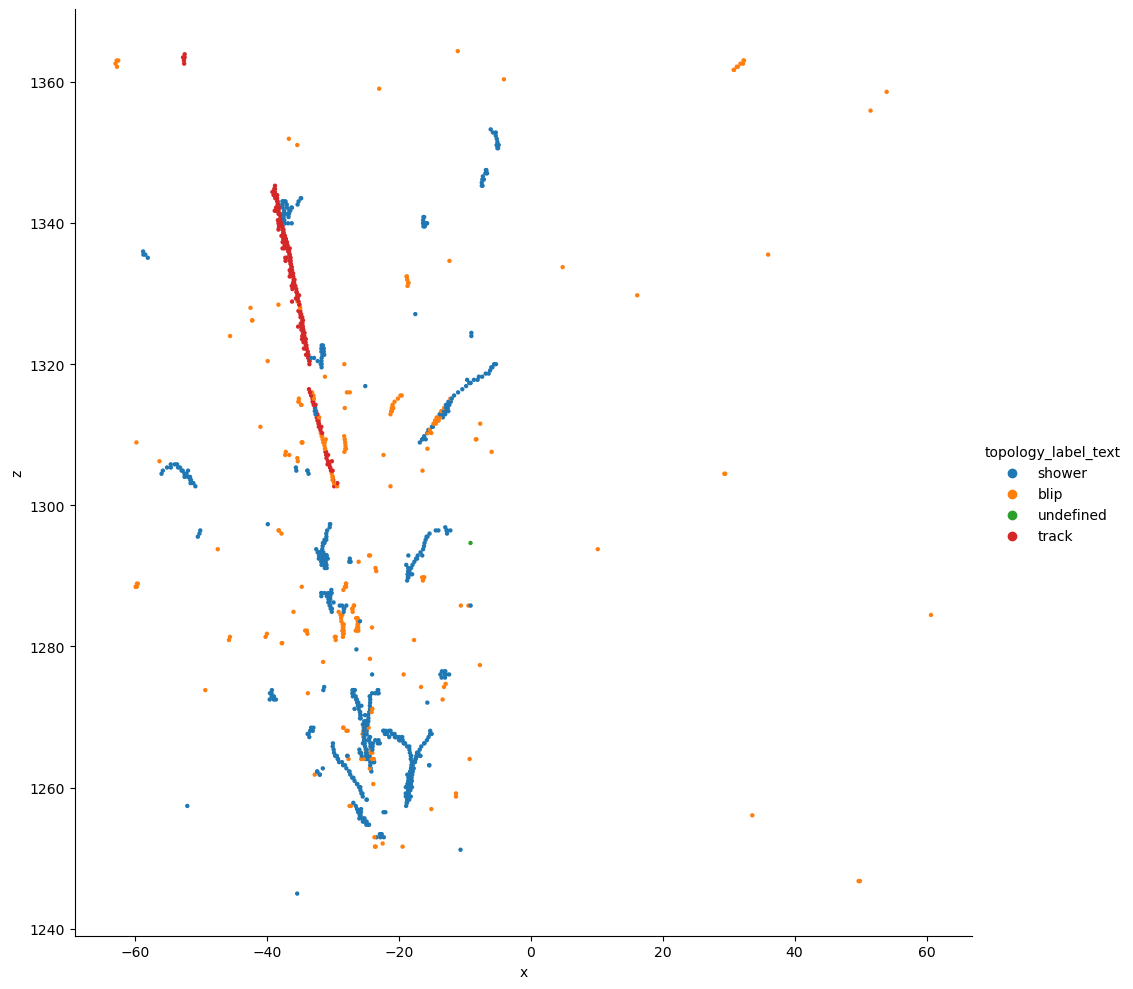

In [30]:
sn.relplot(
    data=df,
    x="x", y="z",
    hue="topology_label_text",
    linewidth=0,
    s=10,
    height=10
)
plt.show()

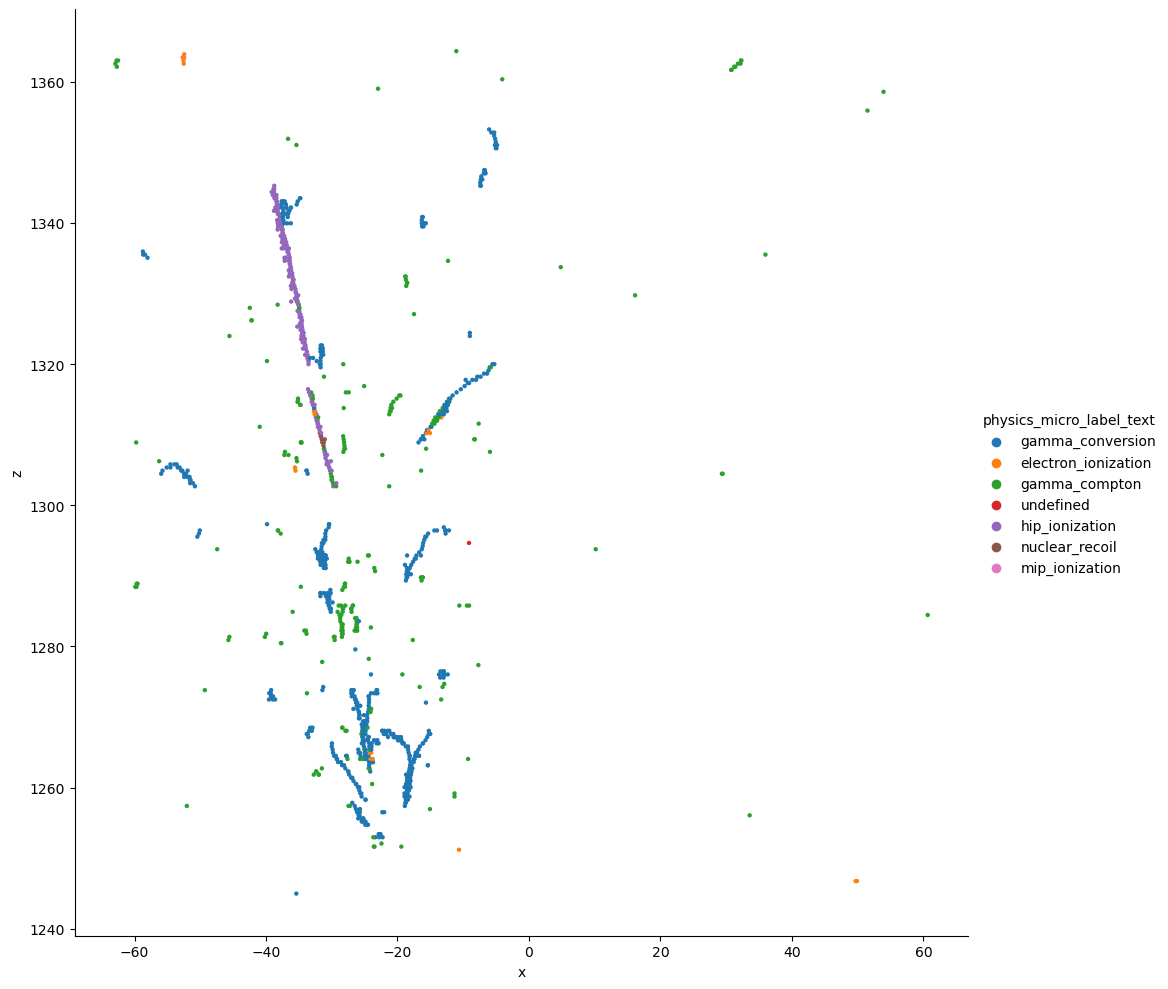

In [31]:
sn.relplot(
    data=df,
    x="x", y="z",
    hue="physics_micro_label_text",
    linewidth=0,
    s=10,
    height=10
    
)
plt.show()

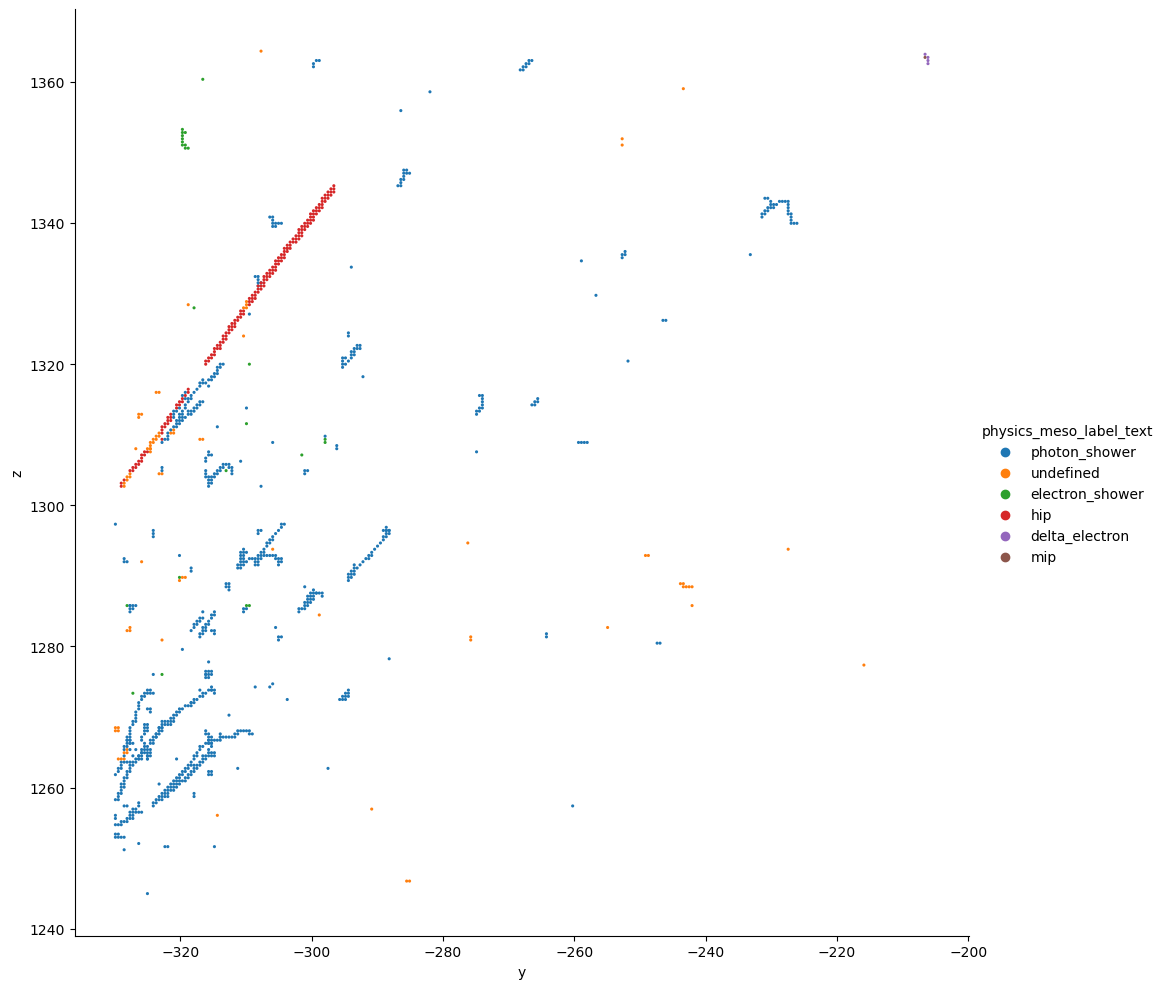

In [32]:
sn.relplot(
    data=df,
    x="y", y="z",
    hue="physics_meso_label_text",
    linewidth=0,
    s=5,
    height=10
)
plt.show()

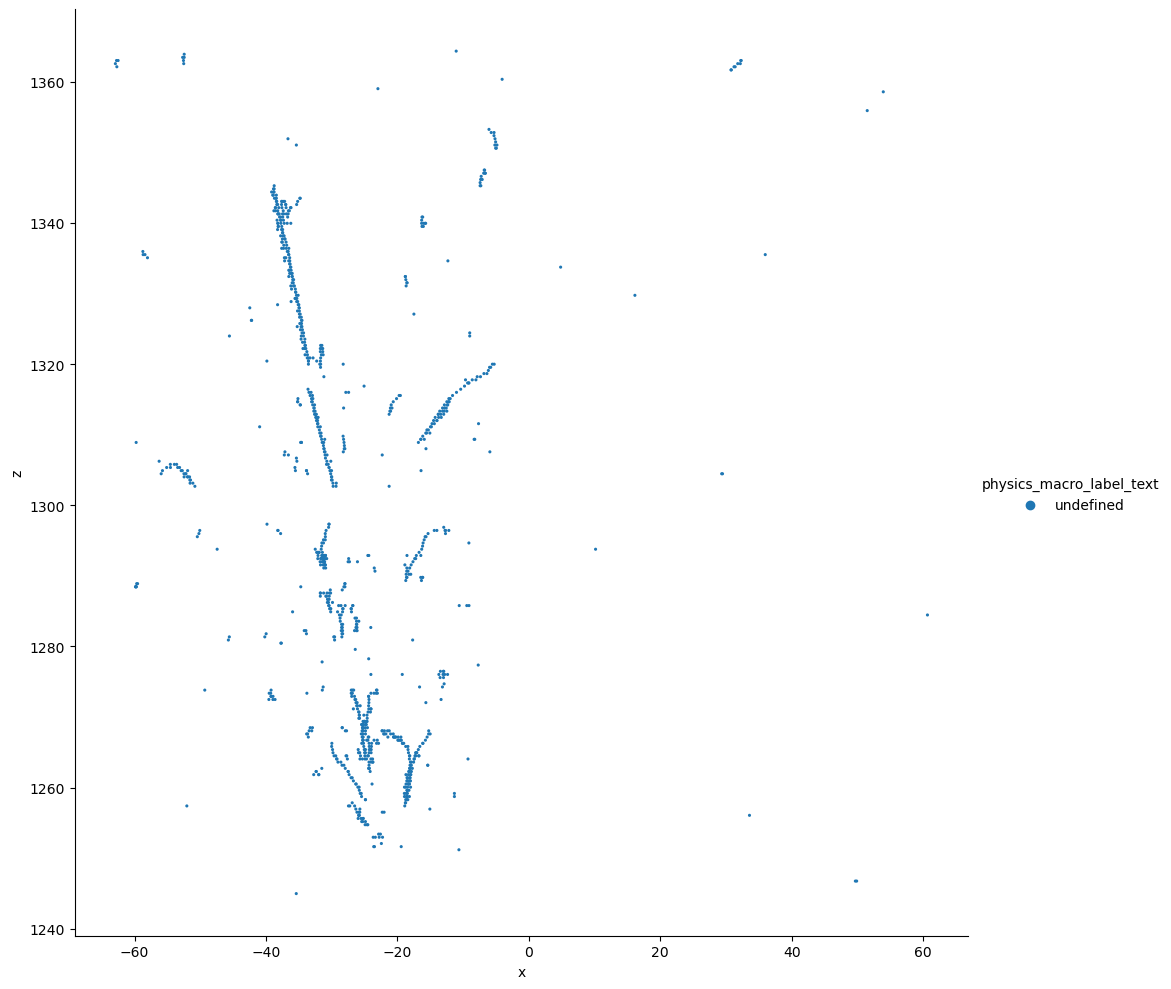

In [33]:
sn.relplot(
    data=df,
    x="x", y="z",
    hue="physics_macro_label_text",
    linewidth=0,
    s=5,
    height=10
)
plt.show()